<a href="https://colab.research.google.com/github/natdebandi/text_mining_unrn/blob/main/Text_mining_clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TEXT MINING

UNRN

Especialización en ciencias de datos aplicada

Natalia Debandi

ndebandi@unrn.edu.ar

**CLASE 2**

Preprocesamiento

Vamos a usa este dataset:
https://www.kaggle.com/datasets/shivamtaneja2304/inshorts-dataset-english


Arrancando clase 2

[github de natalia](https://https://github.com/natdebandi)

In [7]:
!pip install datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [8]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [2]:

import pandas as pd

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [5]:
# CAMBIAR EL LUGAR DEL PATH
# sino pueden  subir el archivo al notebook y usar directamente el nombre
file_path = '/content/drive/MyDrive/4.Clases/Text mining/practica/datasets/english_news_dataset.csv'

df_news = pd.read_csv(file_path)


In [6]:
# Muestra las primeras filas del DataFrame
df_news.head()

,Headline,Content,News Categories,Date
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023


In [9]:
# prompt: contar las filas de df_news

print(len(df_news))


307696


In [10]:
num_rows = df_news.shape[0]
print(f"The DataFrame has {num_rows} rows.")


The DataFrame has 307696 rows.


**Exploracion de la base**

In [11]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307696 entries, 0 to 307695
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Headline         307696 non-null  object
 1   Content          307696 non-null  object
 2   News Categories  307696 non-null  object
 3   Date             307696 non-null  object
dtypes: object(4)
memory usage: 9.4+ MB


In [12]:
df_news.describe()

,Headline,Content,News Categories,Date
count,307696,307696,307696,307696
unique,76603,76677,1335,143
top,"Delhi Bans Ola, Uber From Other States Due To ...",Delhi government has restricted the entry of a...,['entertainment'],2023-10-13
freq,157,157,16728,4171


Hay muchas filas repetidas por lo visto.. a ver..

In [13]:
# Encontrar filas duplicadas en base a todas las columnas
duplicate_rows_df = df_news[df_news.duplicated()]
duplicate_rows_df


,Headline,Content,News Categories,Date
145,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,"['business', 'national']",19-09-2023
153,Up to 8% interest subsidy to be given for Vish...,Finance Minister Nirmala Sitharaman said the g...,"['business', 'national']",19-09-2023
158,Craftsmen made India's economy self-sufficient...,Finance Minister Nirmala Sitharaman on Sunday ...,"['business', 'national']",19-09-2023
169,"Lucknow-UAE flight suffers hydraulic issue, la...",An IndiGo flight made an emergency landing at ...,"['business', 'national']",19-09-2023
170,What is the Mahadev gambling app case?,The Directorate of Enforcement (ED) is investi...,"['business', 'national']",19-09-2023
...,...,...,...,...
307650,What is 'digital dementia'?,'Digital dementia' hypothesis is that overindu...,"['EXPLAINERS', 'Health___Fitness', 'technology']",2024-08-26
307662,Scientists halt and reverse Alzheimer’s by tar...,Scientists at the Technical University of Muni...,"['science', 'Health___Fitness']",2024-08-26
307678,Brain-computer interface helps man with ALS 's...,A man in the US suffering from Amyotrophic Lat...,"['science', 'Health___Fitness']",2024-08-26
307687,New study reveals bursts of rapid aging at 44 ...,A Stanford University study published in Natur...,"['science', 'Health___Fitness']",2024-08-26


In [14]:
#vemos la forma que tienen..

# Tomo uno de los Headlines
row_found = df_news[df_news['Headline'] == "Time stops for you: Mahindra as he praises PM Modi's pace of work"]

# Imprimir la fila encontrada
row_found


,Headline,Content,News Categories,Date
31,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,"['business', 'national']",19-09-2023
145,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,"['business', 'national']",19-09-2023
2197,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,"['business', 'national']",20-09-2023
2252,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,"['business', 'national']",20-09-2023
4355,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,"['business', 'national']",21-09-2023
6456,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,"['business', 'national']",22-09-2023
8559,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,"['business', 'national']",23-09-2023
10655,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,"['business', 'national']",24-09-2023
12746,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,"['business', 'national']",25-09-2023


In [15]:
# Eliminar filas duplicadas con el mismo Healine manteniendo la primera aparición
df_news = df_news.drop_duplicates(subset=['Headline'], keep='first')
df_news.describe()


,Headline,Content,News Categories,Date
count,76603,76603,76603,76603
unique,76603,76463,1326,143
top,Hyderabad researchers discover new genetic dis...,A Pune court has directed the Maharashtra ACB ...,['entertainment'],19-09-2023
freq,1,2,7548,1932


In [16]:
df_news.dropna(inplace=True)
#Recreate the dataframe index
df_news.reset_index(drop=True,inplace=True)
df_news.describe()

,Headline,Content,News Categories,Date
count,76603,76603,76603,76603
unique,76603,76463,1326,143
top,Hyderabad researchers discover new genetic dis...,A Pune court has directed the Maharashtra ACB ...,['entertainment'],19-09-2023
freq,1,2,7548,1932


In [18]:
df_news

,Headline,Content,News Categories,Date
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023
...,...,...,...,...
76598,Effective ways to calm down when stressed,"Whenever you are angry, anxious, or stressed a...",['Health___Fitness'],2024-08-26
76599,"What is iDip, the new diet that causes 13% wei...",Regulated intake of protein and fibre is the m...,['Health___Fitness'],2024-08-26
76600,Experimental pill eases hot flashes for women ...,More than 75 percent of women who experience h...,['Health___Fitness'],2024-08-26
76601,How does stress affect different parts of your...,Constant and chronic stress triggers a fight-o...,['Health___Fitness'],2024-08-26


In [19]:
from ast import literal_eval

#literal eval se usa para tratar como simple texto un campo que tiene una estructura de objeto

df_news['category'] = df_news['News Categories'].apply(func=lambda x: '/'.join(literal_eval(x)))
df_news['headline length'] = df_news['Headline'].apply(func=lambda x: len(x.split()))
df_news['content length'] = df_news['Content'].apply(func=lambda x: len(x.split()))
df_news.head()

,Headline,Content,News Categories,Date,category,headline length,content length
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023,national,11,60
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023,national,11,59
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023,national,10,60
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023,national,13,60
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023,national,11,56


In [20]:
# Add a new column 'cant_category' representing the count of categories
df_news['cant_category'] = df_news['category'].apply(lambda x: len(x.split('/')))

df_news.head()


,Headline,Content,News Categories,Date,category,headline length,content length,cant_category
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023,national,11,60,1
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023,national,11,59,1
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023,national,10,60,1
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023,national,13,60,1
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023,national,11,56,1


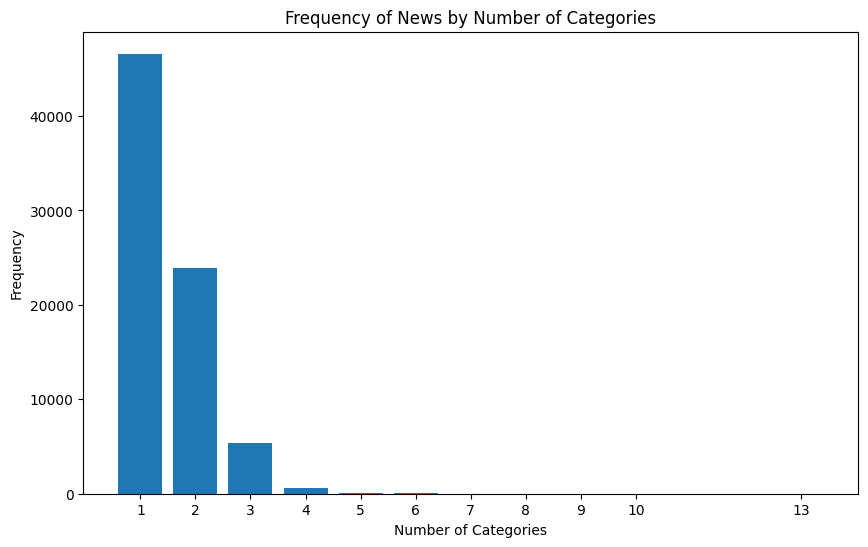

In [22]:
# prompt: hacer un grafico de barras de frecuencias de noticias según cantidad de categorias

import matplotlib.pyplot as plt

# Count the frequency of each category count
category_counts = df_news['cant_category'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Number of Categories')
plt.ylabel('Frequency')
plt.title('Frequency of News by Number of Categories')
plt.xticks(category_counts.index)  # Ensure all x-axis ticks are shown
plt.show()


(np.float64(-0.5), np.float64(1199.5), np.float64(1199.5), np.float64(-0.5))

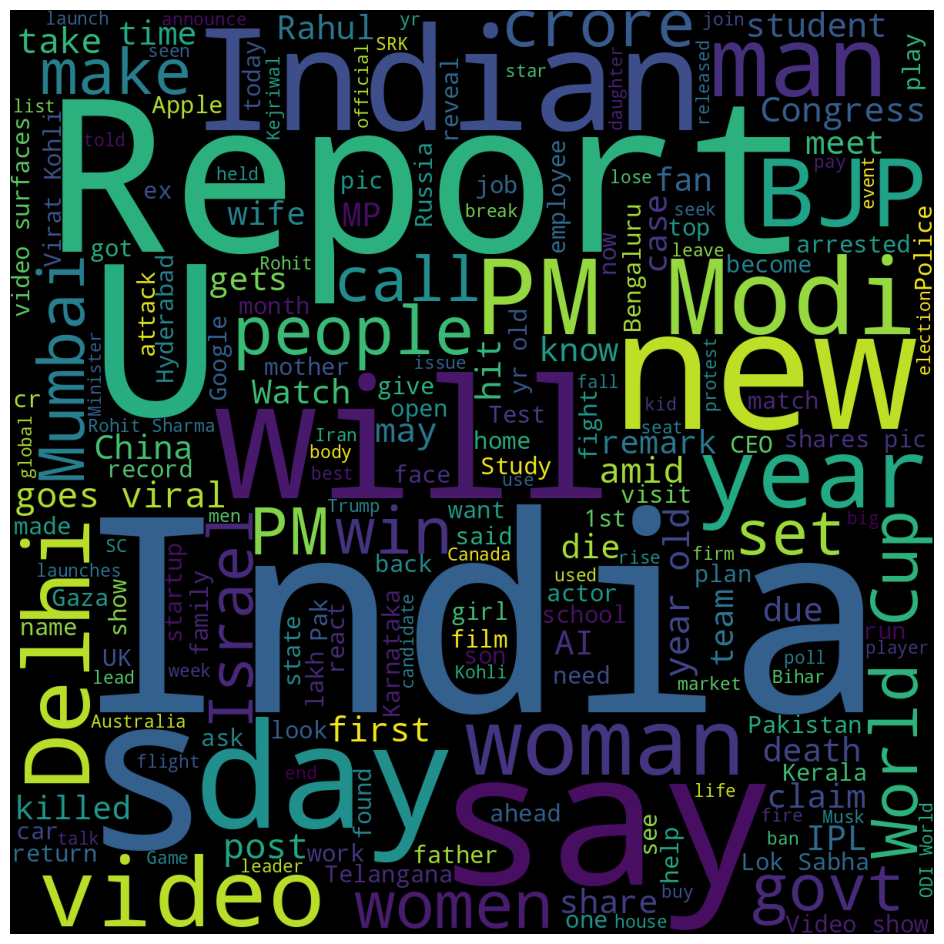

In [21]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df_news['Headline'].values.tolist())), )
axis('off')

**Preprocesamiento**

SEPARAR EN FRASES

Hay muchas maneras:

https://medium.com/@ravindul97/sentence-splitting-in-nlp-2948c90de4a2


In [23]:
#OPCION 1 USANDO EXPRESIONES REGULARES
import re

def split_into_sentences(paragraph):
    # Regular expression pattern
    sentence_endings = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s'
    sentences = re.split(sentence_endings, paragraph)
    return sentences

paragraph = "Mahindra Group Chairman Anand Mahindra took to X to wish Prime Minister Narendra Modi on his birthday on Sunday. The billionaire posted,The relentless pace of your work is such that time stops for you. So, I'm not sure whether birthdays, which symbolise the passing of time, mean anything to you.Nevertheless...I wish you a very happy birthday, he added."
sentences = split_into_sentences(paragraph)
print(sentences)

['Mahindra Group Chairman Anand Mahindra took to X to wish Prime Minister Narendra Modi on his birthday on Sunday.', 'The billionaire posted,The relentless pace of your work is such that time stops for you.', "So, I'm not sure whether birthdays, which symbolise the passing of time, mean anything to you.Nevertheless...I wish you a very happy birthday, he added."]


In [24]:
#OPCION 2 USANDO el paquete de nltk
import nltk

nltk.download('punkt')
sentences = nltk.sent_tokenize(paragraph)

for sentence in sentences:
    print(sentence)

Mahindra Group Chairman Anand Mahindra took to X to wish Prime Minister Narendra Modi on his birthday on Sunday.
The billionaire posted,The relentless pace of your work is such that time stops for you.
So, I'm not sure whether birthdays, which symbolise the passing of time, mean anything to you.Nevertheless...I wish you a very happy birthday, he added.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
# Create a new variable containing the number of sentences in the summary
df_news['sum_sent_count'] = df_news['Content'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [29]:
df_news.head()

,Headline,Content,News Categories,Date,category,headline length,content length,cant_category,categoy_simple,sum_sent_count
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023,national,11,60,1,national,3
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023,national,11,59,1,national,3
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023,national,10,60,1,national,3
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023,national,13,60,1,national,4
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023,national,11,56,1,national,3


In [25]:
# prompt: listar Category unique options

# Assuming df_news is already defined as in the provided code.

# Extract unique categories
unique_categories = set()
for index in df_news.index:
    categories = df_news.loc[index, 'category'].split('/')
    for cat in categories:
        unique_categories.add(cat)

# Print the unique categories
unique_categories


{'Asia_Cup_2023',
 'Asian_Games_2022',
 'Australian_Open_2024',
 'Coronavirus',
 'EURO_2024',
 'EXPLAINERS',
 'FINANCE',
 'Feel_Good_Stories',
 'Health___Fitness',
 'Hockey_World_Cup_2023',
 'IPL',
 'Israel-Hamas_War',
 'LOK_SABHA_ELECTIONS',
 'Lifestyle',
 'ODI_World_Cup_2023',
 'OLYMPICS_2024',
 'PARIS_2024_PARALYMPICS',
 'Russia-Ukraine_Conflict',
 'T20_WORLD_CUP_2024',
 'UNION_BUDGET',
 'Union_Budget_2024',
 'all',
 'arts_and_entertainment',
 'automobile',
 'bollywood',
 'business',
 'city',
 'cricket',
 'crime',
 'cryptocurrency',
 'education',
 'entertainment',
 'experiment',
 'facts',
 'fashion',
 'football',
 'hatke',
 'metaverse',
 'miscellaneous',
 'myfeed',
 'national',
 'policy',
 'politics',
 'science',
 'sports',
 'startup',
 'technology',
 'travel',
 'world'}

In [26]:
#hago una simplificacion para poder mostrar algunos graficos más simples..
national_categories = ['national', 'politics', 'world', 'sports']
df_news['categoy_simple'] = df_news['category'].apply(lambda x: x if x in national_categories else 'Other')


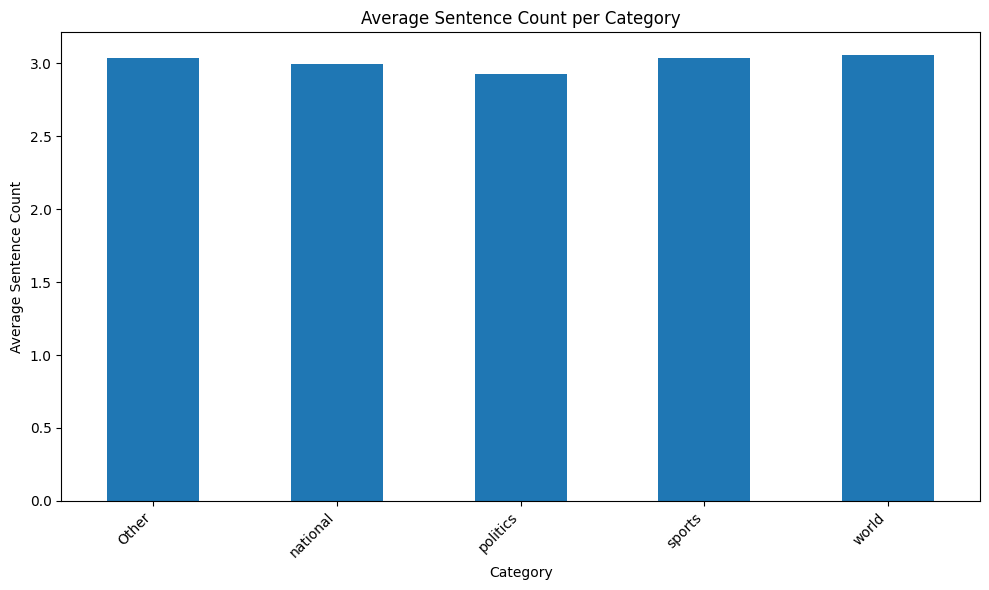

In [30]:
import matplotlib.pyplot as plt

# Group by 'categoria_simple' and calculate the mean of 'sum_sent_count'
category_avg_sentences = df_news.groupby('categoy_simple')['sum_sent_count'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
category_avg_sentences.plot(kind='bar')
plt.title('Average Sentence Count per Category')
plt.xlabel('Category')
plt.ylabel('Average Sentence Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


SEPARAR EN PALABRAS

In [31]:
paragraph = "Mahindra Group Chairman Anand Mahindra took to X to wish Prime Minister Narendra Modi on his birthday on Sunday. The billionaire posted,The relentless pace of your work is such that time stops for you. So, I'm not sure whether birthdays, which symbolise the passing of time, mean anything to you.Nevertheless...I wish you a very happy birthday, he added."
words_split = re.split(r'[;,\s]\s*', paragraph)
print(words_split)

['Mahindra', 'Group', 'Chairman', 'Anand', 'Mahindra', 'took', 'to', 'X', 'to', 'wish', 'Prime', 'Minister', 'Narendra', 'Modi', 'on', 'his', 'birthday', 'on', 'Sunday.', 'The', 'billionaire', 'posted', 'The', 'relentless', 'pace', 'of', 'your', 'work', 'is', 'such', 'that', 'time', 'stops', 'for', 'you.', 'So', "I'm", 'not', 'sure', 'whether', 'birthdays', 'which', 'symbolise', 'the', 'passing', 'of', 'time', 'mean', 'anything', 'to', 'you.Nevertheless...I', 'wish', 'you', 'a', 'very', 'happy', 'birthday', 'he', 'added.']


In [32]:
words_split =nltk.word_tokenize(paragraph)
print(words_split)

['Mahindra', 'Group', 'Chairman', 'Anand', 'Mahindra', 'took', 'to', 'X', 'to', 'wish', 'Prime', 'Minister', 'Narendra', 'Modi', 'on', 'his', 'birthday', 'on', 'Sunday', '.', 'The', 'billionaire', 'posted', ',', 'The', 'relentless', 'pace', 'of', 'your', 'work', 'is', 'such', 'that', 'time', 'stops', 'for', 'you', '.', 'So', ',', 'I', "'m", 'not', 'sure', 'whether', 'birthdays', ',', 'which', 'symbolise', 'the', 'passing', 'of', 'time', ',', 'mean', 'anything', 'to', 'you.Nevertheless', '...', 'I', 'wish', 'you', 'a', 'very', 'happy', 'birthday', ',', 'he', 'added', '.']


In [33]:
df_news['sum_word_count'] = df_news['Content'].apply(lambda x : len(nltk.word_tokenize(x)))

In [34]:
df_news.head()

,Headline,Content,News Categories,Date,category,headline length,content length,cant_category,categoy_simple,sum_sent_count,sum_word_count
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023,national,11,60,1,national,3,67
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023,national,11,59,1,national,3,67
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023,national,10,60,1,national,3,66
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023,national,13,60,1,national,4,77
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023,national,11,56,1,national,3,63


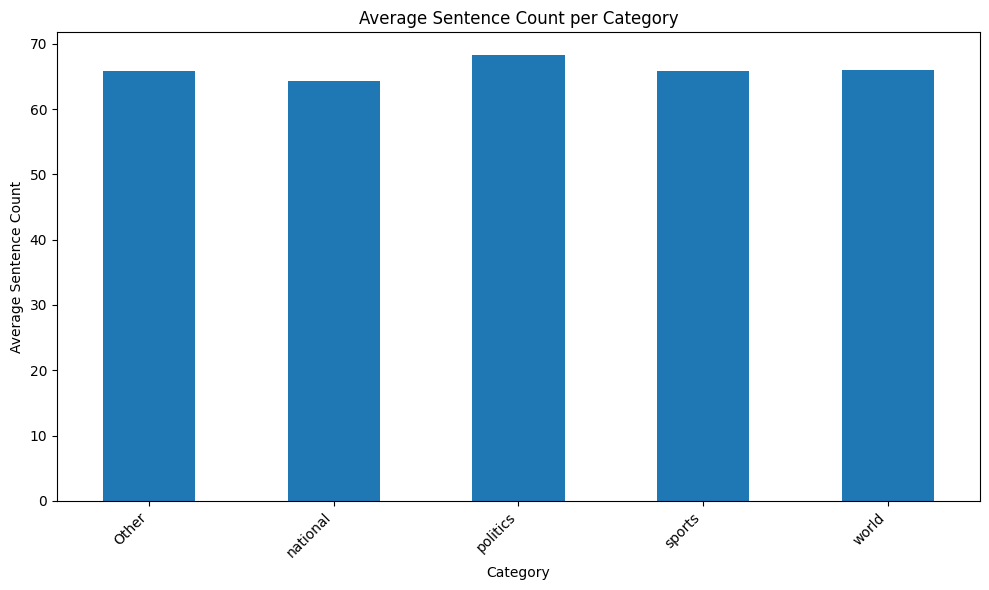

In [35]:


# Group by 'categoria_simple' and calculate the mean of 'sum_sent_count'
category_avg_sentences = df_news.groupby('categoy_simple')['sum_word_count'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
category_avg_sentences.plot(kind='bar')
plt.title('Average Sentence Count per Category')
plt.xlabel('Category')
plt.ylabel('Average Sentence Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Tokenizer usando transformers (hugginface)


In [37]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [38]:
tokenizer(paragraph)

{'input_ids': [101, 7085, 8265, 7412, 1990, 4284, 20556, 7085, 8265, 7412, 1261, 1106, 161, 1106, 3683, 3460, 2110, 11896, 5123, 7412, 12556, 3309, 1113, 1117, 5913, 1113, 3625, 119, 1109, 26961, 6310, 117, 1109, 26011, 6418, 1104, 1240, 1250, 1110, 1216, 1115, 1159, 6260, 1111, 1128, 119, 1573, 117, 146, 112, 182, 1136, 1612, 2480, 5913, 1116, 117, 1134, 5961, 4862, 1103, 3744, 1104, 1159, 117, 1928, 1625, 1106, 1128, 119, 8094, 119, 119, 119, 146, 3683, 1128, 170, 1304, 2816, 5913, 117, 1119, 1896, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Ese será el input del modelo a entrenar cuando usemos un transformer.

Son varios pasos:

In [39]:
tokens = tokenizer.tokenize(paragraph)

print(tokens)

['Ma', '##hin', '##dra', 'Group', 'Chairman', 'Anand', 'Ma', '##hin', '##dra', 'took', 'to', 'X', 'to', 'wish', 'Prime', 'Minister', 'Na', '##ren', '##dra', 'Mo', '##di', 'on', 'his', 'birthday', 'on', 'Sunday', '.', 'The', 'billionaire', 'posted', ',', 'The', 'relentless', 'pace', 'of', 'your', 'work', 'is', 'such', 'that', 'time', 'stops', 'for', 'you', '.', 'So', ',', 'I', "'", 'm', 'not', 'sure', 'whether', 'birthday', '##s', ',', 'which', 'symbol', '##ise', 'the', 'passing', 'of', 'time', ',', 'mean', 'anything', 'to', 'you', '.', 'Nevertheless', '.', '.', '.', 'I', 'wish', 'you', 'a', 'very', 'happy', 'birthday', ',', 'he', 'added', '.']


In [40]:
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[7085, 8265, 7412, 1990, 4284, 20556, 7085, 8265, 7412, 1261, 1106, 161, 1106, 3683, 3460, 2110, 11896, 5123, 7412, 12556, 3309, 1113, 1117, 5913, 1113, 3625, 119, 1109, 26961, 6310, 117, 1109, 26011, 6418, 1104, 1240, 1250, 1110, 1216, 1115, 1159, 6260, 1111, 1128, 119, 1573, 117, 146, 112, 182, 1136, 1612, 2480, 5913, 1116, 117, 1134, 5961, 4862, 1103, 3744, 1104, 1159, 117, 1928, 1625, 1106, 1128, 119, 8094, 119, 119, 119, 146, 3683, 1128, 170, 1304, 2816, 5913, 117, 1119, 1896, 119]


In [41]:
decoded_string = tokenizer.decode(ids)
print(decoded_string)

Mahindra Group Chairman Anand Mahindra took to X to wish Prime Minister Narendra Modi on his birthday on Sunday. The billionaire posted, The relentless pace of your work is such that time stops for you. So, I ' m not sure whether birthdays, which symbolise the passing of time, mean anything to you. Nevertheless... I wish you a very happy birthday, he added.


**Normalización **

STOP WORDS

https://medium.com/data-science/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a


In [42]:
from nltk.corpus import stopwords
stops =  set(stopwords.words('english')+['com'])

In [43]:
words = [word for word in paragraph.split() if word.lower() not in stops]
new_text = " ".join(words)
print(new_text)
print("Old length: ", len(paragraph))
print("New length: ", len(new_text))

Mahindra Group Chairman Anand Mahindra took X wish Prime Minister Narendra Modi birthday Sunday. billionaire posted,The relentless pace work time stops you. So, sure whether birthdays, symbolise passing time, mean anything you.Nevertheless...I wish happy birthday, added.
Old length:  354
New length:  271


Fijense que tenemos mayúsculas

In [44]:
new_text = new_text.lower()
new_text


'mahindra group chairman anand mahindra took x wish prime minister narendra modi birthday sunday. billionaire posted,the relentless pace work time stops you. so, sure whether birthdays, symbolise passing time, mean anything you.nevertheless...i wish happy birthday, added.'

Desde la libreria de transformers se realiza como paso previo al tokenizer


In [45]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [46]:
normalized_text=tokenizer.backend_tokenizer.normalizer.normalize_str(paragraph)
normalized_text

"mahindra group chairman anand mahindra took to x to wish prime minister narendra modi on his birthday on sunday. the billionaire posted,the relentless pace of your work is such that time stops for you. so, i'm not sure whether birthdays, which symbolise the passing of time, mean anything to you.nevertheless...i wish you a very happy birthday, he added."

Lematización

In [47]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

ejemplo="play playing played plays car cars am are is better"

In [48]:
words=ejemplo.split()
res=[]
for w in words:
    res.append([w,lemmatizer.lemmatize(w, pos='n'),
                lemmatizer.lemmatize(w, pos='v'),
                lemmatizer.lemmatize(w, pos='a')])
pd.DataFrame(res,columns=['word','noun','verb','adj'])


,word,noun,verb,adj
0,play,play,play,play
1,playing,playing,play,playing
2,played,played,play,played
3,plays,play,play,plays
4,car,car,car,car
5,cars,car,cars,cars
6,am,am,be,am
7,are,are,be,are
8,is,is,be,is
9,better,better,better,good


Ahora normalizo y tokenizo la base de datos

In [49]:
df_news['Headline_tokens'] = df_news['Headline'].apply(lambda x: nltk.word_tokenize(x))


In [50]:
# saco las stop words
df_news['Headline_tokens'] = df_news['Headline_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stops])


In [51]:

df_news['Headline_tokens'] = df_news['Headline_tokens'].apply(lambda tokens: [word.lower() for word in tokens])


In [52]:
df_news['Content_token'] = df_news['Content'].apply(lambda x: nltk.word_tokenize(x))

In [53]:
# saco las stop words
df_news['Content_token'] = df_news['Content_token'].apply(lambda tokens: [word for word in tokens if word.lower() not in stops])

In [54]:
df_news['Content_token'] = df_news['Content_token'].apply(lambda tokens: [word.lower() for word in tokens])

In [55]:
df_news.head()

,Headline,Content,News Categories,Date,category,headline length,content length,cant_category,categoy_simple,sum_sent_count,sum_word_count,Headline_tokens,Content_token
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023,national,11,60,1,national,3,67,"[congress, leader, baljinder, singh, shot, dea...","[congress, leader, baljinder, singh, shot, dea..."
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023,national,11,59,1,national,3,67,"[17-year-old, girl, preparing, neet, dies, sui...","[another, neet, aspirant, died, suicide, rajas..."
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023,national,10,60,1,national,3,66,"[hampers, welcome, mps, new, parliament, tomor...","[order, mark, first-ever, working, day, new, p..."
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023,national,13,60,1,national,4,77,"[10, %, women, lawmakers, rs, ,, 14, %, ls, :,...","[congress, president, mallikarjun, kharge, ,, ..."
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023,national,11,56,1,national,3,63,"[ganesh, temple, decorated, notes, ,, coins, w...","[sri, sathya, ganapathi, temple, bengaluru, ad..."


Elijan un dataset de noticias de Kaggle:

https://www.kaggle.com/datasets?search=news


Y tratan de replicar las técnicas de preprocesamiento sobre alguno de los features.

También realicen analisis exploratorio.

Usen Chat GPT e internet.

